# CNN for Mnist DB


In [1]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.datasets import cifar100
from tensorflow.keras.models import Sequential 

from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras.optimizers import Adam , Adadelta, RMSprop
from keras import regularizers
from tensorflow.keras import utils 
from tensorflow.keras.preprocessing import image

from google.colab import files
from google.colab import drive 
import numpy as np 
import matplotlib.pyplot as plt
from PIL import Image
import random
import math
import os 
from sklearn.model_selection import train_test_split

%matplotlib inline


2. Load mnist.

In [2]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


3. Standardization and transformation of x_train and y_train.

In [ ]:
y_train = utils.to_categorical(y_train,10)
y_test = utils.to_categorical(y_test, 10 ) 

x_train = x_train.reshape(x_train.shape[0], 28,28,1)
x_test = x_test.reshape(x_test.shape[0], 28,28,1)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

4. Build CNN

In [ ]:
batch_size = 128

model = Sequential()

model.add(BatchNormalization(input_shape = (28,28,1)))

model.add(Conv2D(32,(3,3), padding = 'same', activation ='relu'))
model.add(Conv2D(32,(3,3), padding = 'same', activation ='relu'))

model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation = 'elu'))
model.add(Dropout(0.25))
model.add(Dense(10, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam' , metrics = ['accuracy'])

5. Training of CNN

In [ ]:
history = model.fit(x_train,y_train, batch_size=batch_size, epochs = 15, validation_data= (x_test, y_test), verbose =1 )

Epoch 1/15
469/469 [==============================] - 7s 15ms/step - loss: 0.1563 - accuracy: 0.9524 - val_loss: 0.0460 - val_accuracy: 0.9844
Epoch 2/15
469/469 [==============================] - 7s 14ms/step - loss: 0.0548 - accuracy: 0.9829 - val_loss: 0.0385 - val_accuracy: 0.9883
Epoch 3/15
469/469 [==============================] - 7s 14ms/step - loss: 0.0414 - accuracy: 0.9868 - val_loss: 0.0315 - val_accuracy: 0.9894
Epoch 4/15
469/469 [==============================] - 7s 14ms/step - loss: 0.0313 - accuracy: 0.9898 - val_loss: 0.0358 - val_accuracy: 0.9882
Epoch 5/15
469/469 [==============================] - 7s 14ms/step - loss: 0.0260 - accuracy: 0.9914 - val_loss: 0.0407 - val_accuracy: 0.9883
Epoch 6/15
469/469 [==============================] - 7s 14ms/step - loss: 0.0216 - accuracy: 0.9927 - val_loss: 0.0375 - val_accuracy: 0.9898
Epoch 7/15
469/469 [==============================] - 7s 14ms/step - loss: 0.0181 - accuracy: 0.9939 - val_loss: 0.0331 - val_accuracy: 0.9904

# Reaserch of CNN and normalization layers

Conduct a series of experiments with neural network architecture.
1. Test the influence of the number of conv2_d layers.
2. Test the effect of the number of neurons.
3. Test the impact of MaxPooling2D on the network.
4. Test the impact of Dropout.
5. Write conclusions based on the results of the tests.

In [3]:
(x_train10, y_train10),(x_test10, y_test10) = cifar10.load_data()

170500096/170498071 [==============================] - 11s 0us/step


In [4]:
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [5]:
y_train10 = utils.to_categorical(y_train10, 10)
y_test10 = utils.to_categorical(y_test10, 10)

In [6]:
x_train10, x_test10, y_train10, y_test10 = train_test_split(x_train10, y_train10, test_size=0.2, shuffle=True)    

# Let's see the sample sizes before training
print(x_train10.shape)
print(x_test10.shape)
print(y_train10.shape)
print(y_test10.shape)

(40000, 32, 32, 3)
(10000, 32, 32, 3)
(40000, 10)
(10000, 10)


 1. Test the influence of the number of conv2_d layers. 
 - 4 layers





Epoch 1/15
313/313 [==============================] - 20s 11ms/step - loss: 5.9264 - accuracy: 0.2581 - val_loss: 1.4588 - val_accuracy: 0.4853
Epoch 2/15
313/313 [==============================] - 3s 8ms/step - loss: 1.2458 - accuracy: 0.5607 - val_loss: 1.3163 - val_accuracy: 0.5399
Epoch 3/15
313/313 [==============================] - 3s 8ms/step - loss: 0.9393 - accuracy: 0.6745 - val_loss: 1.2946 - val_accuracy: 0.5622
Epoch 4/15
313/313 [==============================] - 3s 8ms/step - loss: 0.7277 - accuracy: 0.7532 - val_loss: 1.2465 - val_accuracy: 0.5862
Epoch 5/15
313/313 [==============================] - 3s 8ms/step - loss: 0.5613 - accuracy: 0.8221 - val_loss: 1.2799 - val_accuracy: 0.5863
Epoch 6/15
313/313 [==============================] - 3s 8ms/step - loss: 0.4261 - accuracy: 0.8686 - val_loss: 1.3631 - val_accuracy: 0.5849
Epoch 7/15
313/313 [==============================] - 3s 8ms/step - loss: 0.3231 - accuracy: 0.9103 - val_loss: 1.4572 - val_accuracy: 0.5922
Epoc

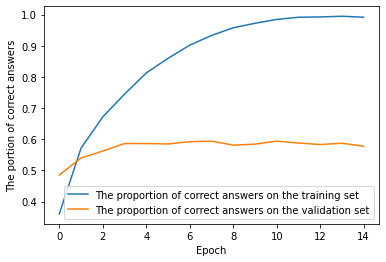

In [7]:
#Create a sequential model
model = Sequential()
#There are 4 convolutional layers
model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(32,32, 3)))
model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))

# Layer for converting 2D data to 1D 
model.add(Flatten())
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.0001), metrics=['accuracy'])


#Trainig model on cifar10
history = model.fit(x_train10, 
                    y_train10, 
                    batch_size=128, 
                    epochs=15,
                    validation_data=(x_test10, y_test10),
                    verbose=1)

# Display the training accuracy graph
plt.plot(history.history['accuracy'], 
         label='The proportion of correct answers on the training set')
plt.plot(history.history['val_accuracy'], 
         label='The proportion of correct answers on the validation set')
plt.xlabel('Epoch')
plt.ylabel('The portion of correct answers')
plt.legend()
plt.show()


- 2 layers of conv2d





Epoch 1/15
313/313 [==============================] - 2s 5ms/step - loss: 27.3243 - accuracy: 0.2129 - val_loss: 4.1167 - val_accuracy: 0.3727
Epoch 2/15
313/313 [==============================] - 1s 5ms/step - loss: 3.5733 - accuracy: 0.3925 - val_loss: 2.8946 - val_accuracy: 0.4255
Epoch 3/15
313/313 [==============================] - 1s 5ms/step - loss: 2.2683 - accuracy: 0.4716 - val_loss: 2.3764 - val_accuracy: 0.4445
Epoch 4/15
313/313 [==============================] - 1s 5ms/step - loss: 1.7214 - accuracy: 0.5327 - val_loss: 2.2815 - val_accuracy: 0.4387
Epoch 5/15
313/313 [==============================] - 1s 5ms/step - loss: 1.3407 - accuracy: 0.5986 - val_loss: 2.0255 - val_accuracy: 0.4764
Epoch 6/15
313/313 [==============================] - 1s 5ms/step - loss: 1.1014 - accuracy: 0.6471 - val_loss: 1.9773 - val_accuracy: 0.4799
Epoch 7/15
313/313 [==============================] - 1s 5ms/step - loss: 0.9350 - accuracy: 0.6888 - val_loss: 1.9331 - val_accuracy: 0.4965
Epoch

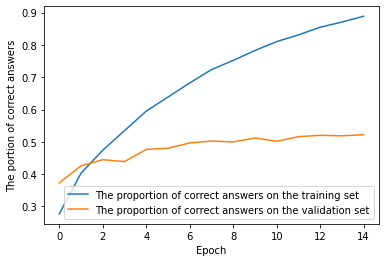

In [8]:
#Create a sequential model
model = Sequential()
#The first convolutional layer
model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(32,32, 3)))
#The 2nd convolutional layer
model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
# Layer for converting 2D data to 1D 
model.add(Flatten())
# FC layer
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.0001), metrics=['accuracy'])

#Trainig model on cifar10
history = model.fit(x_train10, 
                    y_train10, 
                    batch_size=128, 
                    epochs=15,
                    validation_data=(x_test10, y_test10),
                    verbose=1)

# Display the training accuracy graph
plt.plot(history.history['accuracy'], 
         label='The proportion of correct answers on the training set')
plt.plot(history.history['val_accuracy'], 
         label='The proportion of correct answers on the validation set')
plt.xlabel('Epoch')
plt.ylabel('The portion of correct answers')
plt.legend()
plt.show()



Increasing the number of convolutional layer, BatchNormalization and Dropout and Dense layer with increasing neuron quantity, but without adding the MaxPooling2D layer

Epoch 1/15
313/313 [==============================] - 5s 13ms/step - loss: 1.8238 - accuracy: 0.3688 - val_loss: 1.3093 - val_accuracy: 0.5344
Epoch 2/15
313/313 [==============================] - 3s 11ms/step - loss: 1.1833 - accuracy: 0.5797 - val_loss: 1.2048 - val_accuracy: 0.5802
Epoch 3/15
313/313 [==============================] - 3s 11ms/step - loss: 0.9264 - accuracy: 0.6700 - val_loss: 1.2195 - val_accuracy: 0.6118
Epoch 4/15
313/313 [==============================] - 4s 11ms/step - loss: 0.7377 - accuracy: 0.7416 - val_loss: 1.1702 - val_accuracy: 0.6227
Epoch 5/15
313/313 [==============================] - 3s 11ms/step - loss: 0.5588 - accuracy: 0.8088 - val_loss: 1.1908 - val_accuracy: 0.6310
Epoch 6/15
313/313 [==============================] - 4s 11ms/step - loss: 0.4337 - accuracy: 0.8520 - val_loss: 1.1521 - val_accuracy: 0.6549
Epoch 7/15
313/313 [==============================] - 3s 11ms/step - loss: 0.3225 - accuracy: 0.8924 - val_loss: 1.1430 - val_accuracy: 0.6647

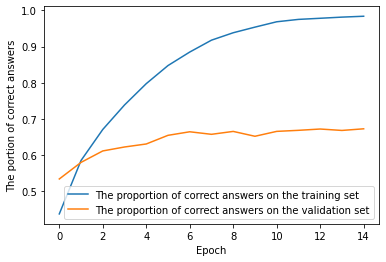

In [9]:
#Create a sequential model
model = Sequential()
#Convolutional layers
model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(32,32, 3)))
model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))

model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Conv2D(64, (3, 3), padding='same', activation='relu', input_shape=(32,32, 3)))
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))

model.add(BatchNormalization())
model.add(Dropout(0.3))

# Layer for converting 2D data to 1D 
model.add(Flatten())

# FC layer
model.add(Dense(100, activation= 'relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.0001), metrics=['accuracy'])

#Trainig model on cifar10
history = model.fit(x_train10, 
                    y_train10, 
                    batch_size=128, 
                    epochs=15,
                    validation_data=(x_test10, y_test10),
                    verbose=1)

# Display the training accuracy graph
plt.plot(history.history['accuracy'], 
         label='The proportion of correct answers on the training set')
plt.plot(history.history['val_accuracy'], 
         label='The proportion of correct answers on the validation set')
plt.xlabel('Epoch')
plt.ylabel('The portion of correct answers')
plt.legend()
plt.show()

Now there is the same network with adding MaxPooling2d layer 

Epoch 1/15
313/313 [==============================] - 3s 7ms/step - loss: 2.1290 - accuracy: 0.2688 - val_loss: 1.5038 - val_accuracy: 0.4591
Epoch 2/15
313/313 [==============================] - 2s 6ms/step - loss: 1.5145 - accuracy: 0.4541 - val_loss: 1.3356 - val_accuracy: 0.5193
Epoch 3/15
313/313 [==============================] - 2s 6ms/step - loss: 1.3373 - accuracy: 0.5220 - val_loss: 1.2758 - val_accuracy: 0.5423
Epoch 4/15
313/313 [==============================] - 2s 6ms/step - loss: 1.2252 - accuracy: 0.5584 - val_loss: 1.1498 - val_accuracy: 0.5911
Epoch 5/15
313/313 [==============================] - 2s 6ms/step - loss: 1.1278 - accuracy: 0.5924 - val_loss: 1.1733 - val_accuracy: 0.5904
Epoch 6/15
313/313 [==============================] - 2s 6ms/step - loss: 1.0701 - accuracy: 0.6167 - val_loss: 1.0473 - val_accuracy: 0.6309
Epoch 7/15
313/313 [==============================] - 2s 6ms/step - loss: 0.9934 - accuracy: 0.6461 - val_loss: 1.1595 - val_accuracy: 0.5977
Epoch 

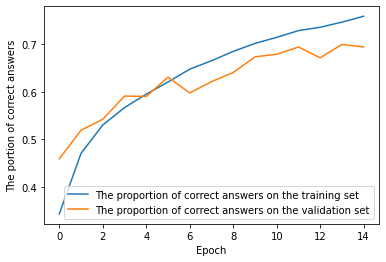

In [10]:
#Create a sequential model
model = Sequential()
#Convolutional layers
model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(32,32, 3)))
model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Conv2D(64, (3, 3), padding='same', activation='relu', input_shape=(32,32, 3)))
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.3))

# Layer for converting 2D data to 1D 
model.add(Flatten())

# FC layer
model.add(Dense(100, activation= 'relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.0001), metrics=['accuracy'])

#Trainig model on cifar10
history = model.fit(x_train10, 
                    y_train10, 
                    batch_size=128, 
                    epochs=15,
                    validation_data=(x_test10, y_test10),
                    verbose=1)

# Display the training accuracy graph
plt.plot(history.history['accuracy'], 
         label='The proportion of correct answers on the training set')
plt.plot(history.history['val_accuracy'], 
         label='The proportion of correct answers on the validation set')
plt.xlabel('Epoch')
plt.ylabel('The portion of correct answers')
plt.legend()
plt.show()

Reduce amount of MaxPooling2D layer, while increase amount of Conv2D layer

Epoch 1/15
313/313 [==============================] - 4s 11ms/step - loss: 2.0203 - accuracy: 0.2973 - val_loss: 1.4186 - val_accuracy: 0.5071
Epoch 2/15
313/313 [==============================] - 3s 10ms/step - loss: 1.3675 - accuracy: 0.5093 - val_loss: 1.2538 - val_accuracy: 0.5770
Epoch 3/15
313/313 [==============================] - 3s 10ms/step - loss: 1.1778 - accuracy: 0.5838 - val_loss: 1.1178 - val_accuracy: 0.6248
Epoch 4/15
313/313 [==============================] - 3s 10ms/step - loss: 1.0415 - accuracy: 0.6304 - val_loss: 1.1290 - val_accuracy: 0.6289
Epoch 5/15
313/313 [==============================] - 3s 10ms/step - loss: 0.9255 - accuracy: 0.6737 - val_loss: 1.1811 - val_accuracy: 0.6187
Epoch 6/15
313/313 [==============================] - 3s 10ms/step - loss: 0.8304 - accuracy: 0.7025 - val_loss: 1.0217 - val_accuracy: 0.6724
Epoch 7/15
313/313 [==============================] - 3s 10ms/step - loss: 0.7409 - accuracy: 0.7371 - val_loss: 1.1167 - val_accuracy: 0.6558

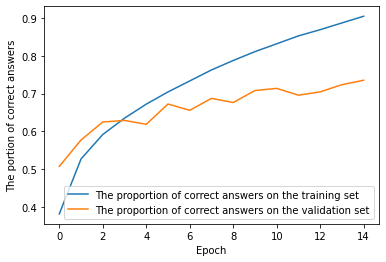

In [11]:
#Create a sequential model
model = Sequential()
#Convolutional layers
model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(32,32, 3)))
model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Conv2D(64, (3, 3), padding='same', activation='relu', input_shape=(32,32, 3)))
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))

model.add(BatchNormalization())
model.add(Dropout(0.3))


model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))

model.add(BatchNormalization())
model.add(Dropout(0.3))
# Layer for converting 2D data to 1D 
model.add(Flatten())

# FC layer
model.add(Dense(100, activation= 'relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.0001), metrics=['accuracy'])

#Trainig model on cifar10
history = model.fit(x_train10, 
                    y_train10, 
                    batch_size=128, 
                    epochs=15,
                    validation_data=(x_test10, y_test10),
                    verbose=1)

# Display the training accuracy graph
plt.plot(history.history['accuracy'], 
         label='The proportion of correct answers on the training set')
plt.plot(history.history['val_accuracy'], 
         label='The proportion of correct answers on the validation set')
plt.xlabel('Epoch')
plt.ylabel('The portion of correct answers')
plt.legend()
plt.show()

Now let's check the same network, but with the addition of a MaxPooling layer after every second convolutional layer

Epoch 1/15
313/313 [==============================] - 3s 8ms/step - loss: 2.2627 - accuracy: 0.2356 - val_loss: 1.6143 - val_accuracy: 0.4130
Epoch 2/15
313/313 [==============================] - 2s 7ms/step - loss: 1.6256 - accuracy: 0.4104 - val_loss: 1.5078 - val_accuracy: 0.4724
Epoch 3/15
313/313 [==============================] - 2s 7ms/step - loss: 1.4399 - accuracy: 0.4780 - val_loss: 1.4764 - val_accuracy: 0.4931
Epoch 4/15
313/313 [==============================] - 2s 7ms/step - loss: 1.3375 - accuracy: 0.5165 - val_loss: 1.2506 - val_accuracy: 0.5551
Epoch 5/15
313/313 [==============================] - 2s 7ms/step - loss: 1.2541 - accuracy: 0.5511 - val_loss: 1.2579 - val_accuracy: 0.5664
Epoch 6/15
313/313 [==============================] - 2s 7ms/step - loss: 1.1819 - accuracy: 0.5734 - val_loss: 1.1983 - val_accuracy: 0.5914
Epoch 7/15
313/313 [==============================] - 2s 7ms/step - loss: 1.1146 - accuracy: 0.5988 - val_loss: 1.2068 - val_accuracy: 0.5970
Epoch 

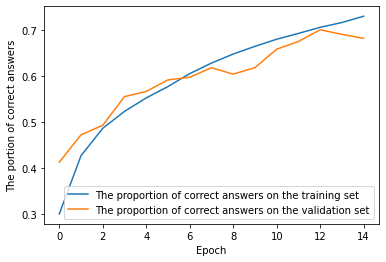

In [12]:
#Create a sequential model
model = Sequential()
#Convolutional layers
# 1st block
model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(32,32, 3)))
model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.3))

# 2nd block
model.add(Conv2D(64, (3, 3), padding='same', activation='relu', input_shape=(32,32, 3)))
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.3))

# 3rd block
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.3))
# Layer for converting 2D data to 1D 
model.add(Flatten())

# FC layer
model.add(Dense(100, activation= 'relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.0001), metrics=['accuracy'])

#Trainig model on cifar100
history = model.fit(x_train10, 
                    y_train10, 
                    batch_size=128, 
                    epochs=15,
                    validation_data=(x_test10, y_test10),
                    verbose=1)

# Display the training accuracy graph
plt.plot(history.history['accuracy'], 
         label='The proportion of correct answers on the training set')
plt.plot(history.history['val_accuracy'], 
         label='The proportion of correct answers on the validation set')
plt.xlabel('Epoch')
plt.ylabel('The portion of correct answers')
plt.legend()
plt.show()

Now take the network with the best indicator of accuracy so far and increase the number of neurons in FC layers




Epoch 1/15
313/313 [==============================] - 5s 12ms/step - loss: 2.4846 - accuracy: 0.2336 - val_loss: 1.5766 - val_accuracy: 0.4368
Epoch 2/15
313/313 [==============================] - 3s 11ms/step - loss: 1.7357 - accuracy: 0.4104 - val_loss: 1.4558 - val_accuracy: 0.5085
Epoch 3/15
313/313 [==============================] - 3s 11ms/step - loss: 1.5016 - accuracy: 0.4788 - val_loss: 1.3586 - val_accuracy: 0.5401
Epoch 4/15
313/313 [==============================] - 3s 11ms/step - loss: 1.3519 - accuracy: 0.5257 - val_loss: 1.1709 - val_accuracy: 0.5927
Epoch 5/15
313/313 [==============================] - 3s 11ms/step - loss: 1.2318 - accuracy: 0.5649 - val_loss: 1.0829 - val_accuracy: 0.6285
Epoch 6/15
313/313 [==============================] - 3s 11ms/step - loss: 1.1260 - accuracy: 0.6054 - val_loss: 1.0778 - val_accuracy: 0.6325
Epoch 7/15
313/313 [==============================] - 3s 11ms/step - loss: 1.0536 - accuracy: 0.6324 - val_loss: 1.0259 - val_accuracy: 0.6564

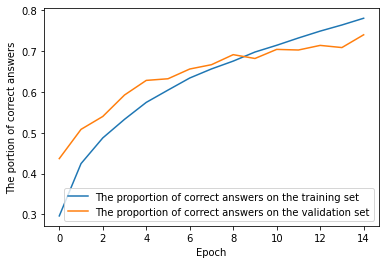

In [16]:
#Create a sequential model
model = Sequential()
#Convolutional layers
model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(32,32, 3)))
model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Conv2D(64, (3, 3), padding='same', activation='relu', input_shape=(32,32, 3)))
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))

model.add(BatchNormalization())
model.add(Dropout(0.3))


model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))

model.add(BatchNormalization())
model.add(Dropout(0.3))
# Layer for converting 2D data to 1D 
model.add(Flatten())

# FC layers
model.add(Dense(200, activation= 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(100, activation= 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.0001), metrics=['accuracy'])

#Trainig model on cifar100
history = model.fit(x_train10, 
                    y_train10, 
                    batch_size=128, 
                    epochs=15,
                    validation_data=(x_test10, y_test10),
                    verbose=1)

# Display the training accuracy graph
plt.plot(history.history['accuracy'], 
         label='The proportion of correct answers on the training set')
plt.plot(history.history['val_accuracy'], 
         label='The proportion of correct answers on the validation set')
plt.xlabel('Epoch')
plt.ylabel('The portion of correct answers')
plt.legend()
plt.show()

reduce Dropout to 20%

Epoch 1/15
313/313 [==============================] - 5s 12ms/step - loss: 2.1960 - accuracy: 0.2892 - val_loss: 1.4576 - val_accuracy: 0.4827
Epoch 2/15
313/313 [==============================] - 3s 11ms/step - loss: 1.4959 - accuracy: 0.4794 - val_loss: 1.2971 - val_accuracy: 0.5402
Epoch 3/15
313/313 [==============================] - 3s 11ms/step - loss: 1.2781 - accuracy: 0.5443 - val_loss: 1.4399 - val_accuracy: 0.5283
Epoch 4/15
313/313 [==============================] - 3s 11ms/step - loss: 1.1388 - accuracy: 0.5955 - val_loss: 1.1601 - val_accuracy: 0.6056
Epoch 5/15
313/313 [==============================] - 3s 11ms/step - loss: 1.0224 - accuracy: 0.6396 - val_loss: 1.0413 - val_accuracy: 0.6420
Epoch 6/15
313/313 [==============================] - 3s 11ms/step - loss: 0.9160 - accuracy: 0.6775 - val_loss: 1.0604 - val_accuracy: 0.6397
Epoch 7/15
313/313 [==============================] - 3s 11ms/step - loss: 0.8321 - accuracy: 0.7092 - val_loss: 1.0150 - val_accuracy: 0.6604

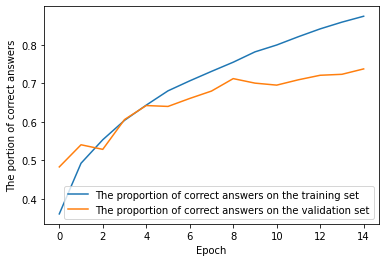

In [20]:
#Create a sequential model
model = Sequential()
#Convolutional layers
model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(32,32, 3)))
model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3), padding='same', activation='relu', input_shape=(32,32, 3)))
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))

model.add(BatchNormalization())
model.add(Dropout(0.2))


model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))

model.add(BatchNormalization())
model.add(Dropout(0.2))
# Layer for converting 2D data to 1D 
model.add(Flatten())

# FC layers
model.add(Dense(200, activation= 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(100, activation= 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.0001), metrics=['accuracy'])


#Trainig model on cifar100
history = model.fit(x_train10, 
                    y_train10, 
                    batch_size=128, 
                    epochs=15,
                    validation_data=(x_test10, y_test10),
                    verbose=1)

# Display the training accuracy graph
plt.plot(history.history['accuracy'], 
         label='The proportion of correct answers on the training set')
plt.plot(history.history['val_accuracy'], 
         label='The proportion of correct answers on the validation set')
plt.xlabel('Epoch')
plt.ylabel('The portion of correct answers')
plt.legend()
plt.show()

Increase Dropout to 40%

Epoch 1/15
313/313 [==============================] - 5s 12ms/step - loss: 2.7431 - accuracy: 0.1976 - val_loss: 1.9757 - val_accuracy: 0.3112
Epoch 2/15
313/313 [==============================] - 3s 11ms/step - loss: 2.0368 - accuracy: 0.3264 - val_loss: 1.6417 - val_accuracy: 0.4280
Epoch 3/15
313/313 [==============================] - 3s 11ms/step - loss: 1.7784 - accuracy: 0.3954 - val_loss: 1.4137 - val_accuracy: 0.5013
Epoch 4/15
313/313 [==============================] - 3s 11ms/step - loss: 1.6085 - accuracy: 0.4434 - val_loss: 1.4272 - val_accuracy: 0.5114
Epoch 5/15
313/313 [==============================] - 3s 11ms/step - loss: 1.4675 - accuracy: 0.4880 - val_loss: 1.2701 - val_accuracy: 0.5616
Epoch 6/15
313/313 [==============================] - 3s 11ms/step - loss: 1.3727 - accuracy: 0.5182 - val_loss: 1.1632 - val_accuracy: 0.5980
Epoch 7/15
313/313 [==============================] - 3s 11ms/step - loss: 1.2617 - accuracy: 0.5569 - val_loss: 1.1568 - val_accuracy: 0.6084

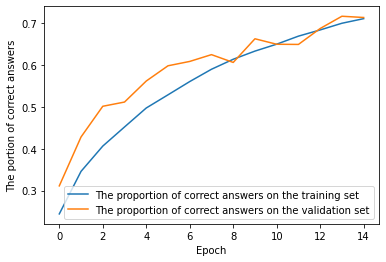

In [21]:
#Create a sequential model
model = Sequential()
#Convolutional layers
model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(32,32, 3)))
model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(64, (3, 3), padding='same', activation='relu', input_shape=(32,32, 3)))
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))

model.add(BatchNormalization())
model.add(Dropout(0.4))


model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))

model.add(BatchNormalization())
model.add(Dropout(0.4))
# Layer for converting 2D data to 1D 
model.add(Flatten())

# FC layers
model.add(Dense(200, activation= 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Dense(100, activation= 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.0001), metrics=['accuracy'])


#Trainig model on cifar100
history = model.fit(x_train10, 
                    y_train10, 
                    batch_size=128, 
                    epochs=15,
                    validation_data=(x_test10, y_test10),
                    verbose=1)

# Display the training accuracy graph
plt.plot(history.history['accuracy'], 
         label='The proportion of correct answers on the training set')
plt.plot(history.history['val_accuracy'], 
         label='The proportion of correct answers on the validation set')
plt.xlabel('Epoch')
plt.ylabel('The portion of correct answers')
plt.legend()
plt.show()

Increase Dropout to 50%

Epoch 1/15
313/313 [==============================] - 5s 12ms/step - loss: 3.0981 - accuracy: 0.1659 - val_loss: 2.1255 - val_accuracy: 0.2526
Epoch 2/15
313/313 [==============================] - 3s 11ms/step - loss: 2.3283 - accuracy: 0.2712 - val_loss: 1.8795 - val_accuracy: 0.3365
Epoch 3/15
313/313 [==============================] - 3s 11ms/step - loss: 2.0350 - accuracy: 0.3277 - val_loss: 1.7352 - val_accuracy: 0.3879
Epoch 4/15
313/313 [==============================] - 3s 11ms/step - loss: 1.8785 - accuracy: 0.3642 - val_loss: 1.6191 - val_accuracy: 0.4426
Epoch 5/15
313/313 [==============================] - 3s 11ms/step - loss: 1.7224 - accuracy: 0.4105 - val_loss: 1.4498 - val_accuracy: 0.4920
Epoch 6/15
313/313 [==============================] - 3s 11ms/step - loss: 1.6367 - accuracy: 0.4329 - val_loss: 1.3432 - val_accuracy: 0.5264
Epoch 7/15
313/313 [==============================] - 3s 11ms/step - loss: 1.5403 - accuracy: 0.4594 - val_loss: 1.2784 - val_accuracy: 0.5454

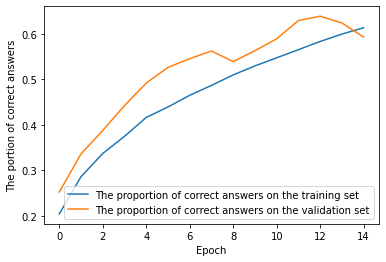

In [22]:
#Create a sequential model
model = Sequential()
#Convolutional layers
model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(32,32, 3)))
model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Conv2D(64, (3, 3), padding='same', activation='relu', input_shape=(32,32, 3)))
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))

model.add(BatchNormalization())
model.add(Dropout(0.5))


model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))

model.add(BatchNormalization())
model.add(Dropout(0.5))
# Layer for converting 2D data to 1D 
model.add(Flatten())

# FC layers
model.add(Dense(200, activation= 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(100, activation= 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.0001), metrics=['accuracy'])


#Trainig model on cifar100
history = model.fit(x_train10, 
                    y_train10, 
                    batch_size=128, 
                    epochs=15,
                    validation_data=(x_test10, y_test10),
                    verbose=1)

# Display the training accuracy graph
plt.plot(history.history['accuracy'], 
         label='The proportion of correct answers on the training set')
plt.plot(history.history['val_accuracy'], 
         label='The proportion of correct answers on the validation set')
plt.xlabel('Epoch')
plt.ylabel('The portion of correct answers')
plt.legend()
plt.show()

Conclusion: for cifar10, you can see that increasing the number of Conv2D layers improves accuracy as well as increasing number of neurons in FC. However, increasing the MaxPooling2D layers decreases the val_accuracy percentage, but reduces overfitting. Applying maxpooling with increasing percetnage of dropout does not make sense.

Also, increasing the layers of network does not always make sense. The main thing is to find a middle ground.

# CNN for own DB
Find your own base of images and divide it into classes for classification. Select the architecture of the convolutional neural network and achieve the classification accuracy of your database at least 85% on the test sample.

In [ ]:
from google.colab import drive
from google.colab import files
drive.mount ('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
!rm -R /content/photos

In [ ]:
!unzip -q "/content/drive/My Drive/база.zip" -d /content/photos 

In [ ]:
train_path = '/content/photos' # Folder with folders of pictures sorted by categories
batch_size = 2 # Sample size
img_width = 96 # Image Width
img_height = 54 # Image height

In [ ]:
# Image generator
datagen = ImageDataGenerator(
    rescale=1. / 255, # Change color values to fractional readings
    rotation_range=10, # Rotate images when generating a selection
    width_shift_range=0.1, # Move images in width when generating a selection
    height_shift_range=0.1, # Move images in height when generating a selection
    zoom_range=0.1, # Zoom image
    horizontal_flip=True, # Disable image flipping
    fill_mode='nearest', # Padding pixels outside of input boundaries
    validation_split=0.1 # Specify the division of images into training and val samples
)

In [ ]:
# training sample
train_generator = datagen.flow_from_directory(
    train_path, # Path to the entire selection 
    target_size=(img_width, img_height), # Image size
    batch_size=batch_size, 
    class_mode='categorical', # Categorical type of sampling
    shuffle=True, 
    subset='training' 
)

# validation sample
validation_generator = datagen.flow_from_directory(
    train_path, # Path to the entire selection
    target_size=(img_width, img_height), # Image size
    batch_size=batch_size, 
    class_mode='categorical',
    shuffle=True, 
    subset='validation' 
)

Found 72 images belonging to 4 classes.
Found 8 images belonging to 4 classes.


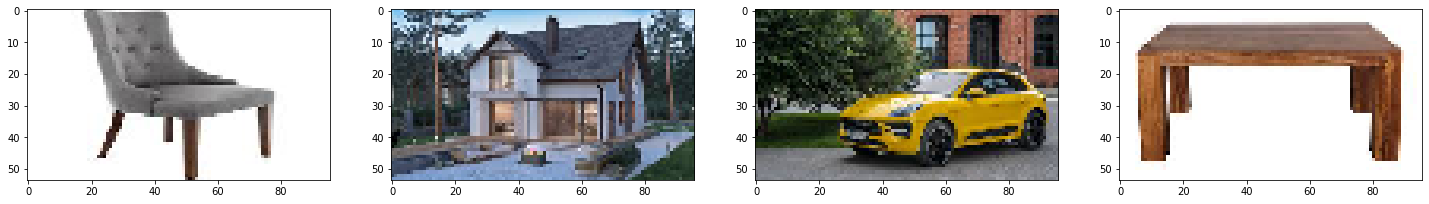

In [ ]:
# For example, we display pictures for each class

fig, axs = plt.subplots(1, 4, figsize=(25, 5)) # Create a canvas from 3 graphs
for i in range(4): # go through all classes
  photo_path = train_path + '/' + os.listdir(train_path)[i] + '/' # Form the path to the selection
  img_path = photo_path + random.choice(os.listdir(photo_path)) # Choose a random photo to display
  axs[i].imshow(image.load_img(img_path, target_size=(img_height, img_width))) # Display photo

plt.show() 

In [ ]:
#Create a sequential model
model = Sequential()
#Convolutional layers
model.add(Conv2D(64, (3, 3), padding='same', activation='relu', input_shape=(img_width, img_height, 3)))
model.add(BatchNormalization())

model.add(Conv2D(64, (3, 3), padding='same', activation='relu', input_shape=(img_width, img_height, 3)))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Conv2D(128, (3, 3), padding='same', activation='relu', input_shape=(img_width, img_height, 3)))
model.add(BatchNormalization())

model.add(Conv2D(128, (3, 3), padding='same', activation='relu', input_shape=(img_width, img_height, 3)))
model.add(BatchNormalization())

# Layer for converting 2D data to 1D 
model.add(Flatten())
model.add(Dense(len(train_generator.class_indices), activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.0001), metrics=['accuracy'])

Epoch 1/10
36/36 [==============================] - 1s 25ms/step - loss: 3.6058 - accuracy: 0.7917 - val_loss: 8.7639 - val_accuracy: 0.5000
Epoch 2/10
36/36 [==============================] - 1s 25ms/step - loss: 2.0816 - accuracy: 0.8889 - val_loss: 11.0793 - val_accuracy: 0.3750
Epoch 3/10
36/36 [==============================] - 1s 26ms/step - loss: 3.8761 - accuracy: 0.8750 - val_loss: 6.8833 - val_accuracy: 0.2500
Epoch 4/10
36/36 [==============================] - 1s 25ms/step - loss: 3.7532 - accuracy: 0.8750 - val_loss: 0.9850 - val_accuracy: 0.8750
Epoch 5/10
36/36 [==============================] - 1s 25ms/step - loss: 2.0955 - accuracy: 0.8750 - val_loss: 2.6555 - val_accuracy: 0.8750
Epoch 6/10
36/36 [==============================] - 1s 26ms/step - loss: 3.8149 - accuracy: 0.8889 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 7/10
36/36 [==============================] - 1s 25ms/step - loss: 1.3533 - accuracy: 0.9306 - val_loss: 1.1956 - val_accuracy: 0.7500
Epoch 8/

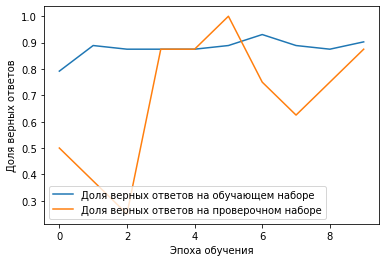

In [ ]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch = train_generator.samples // batch_size,
    validation_data = validation_generator, 
    validation_steps = validation_generator.samples // batch_size,
    epochs=10,
    verbose=1
)

# Display the training accuracy graph
plt.plot(history.history['accuracy'], 
         label='The proportion of correct answers on the training set')
plt.plot(history.history['val_accuracy'], 
         label='The proportion of correct answers on the validation set')
plt.xlabel('Epoch')
plt.ylabel('The portion of correct answers')
plt.legend()
plt.show()